# DATA SCIENCE JOB SALARIES

## Introduction
This analysis provides an in-depth look into the data science job market, highlighting the factors that impact employment in the field.
Whether you’re a seasoned data scientist evaluating your salary or someone considering a career in data science, this analysis offers valuable insights into job trends and compensation.

**Dataset**
The dataset used in this analysis includes anonymized information about data science roles, gathered from sources like surveys, job listings, and public records.
With this data, we can examine salary patterns and variations in data science roles across different time periods and demographic groups. It also supports salary benchmarking, helps assess how factors like experience and company size affect compensation, and informs career choices in data science.

### Questions
This project seeks to answer and explore these question;
- What are the most common data science roles, and how have they evolved over recent years?
- How does experience level impact salary across different data science roles?
- What impact does company size have on salaries for data science professionals?
- How do geographic location and remote work options influence data science salaries?
- Which specific roles and factors lead to the highest-paying opportunities in data science?

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px
warnings.filterwarnings('ignore')

In [5]:
#loading the car_data
df = pd.read_csv('DataScience.csv') 
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


# Data Inspection

In [7]:
# checking the 10 top rows
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,41809,JP,50,JP,L


In [8]:
# checking the 10 bottom rows
df.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14828,2024,EN,FT,Data Engineer,17598,USD,17598,MX,50,MX,L
14829,2023,MI,FT,Business Data Analyst,17000,USD,17000,AM,100,RU,L
14830,2023,EN,FT,Data Scientist,16000,USD,16000,EC,100,EC,L
14831,2022,EN,FT,Research Engineer,15662,EUR,16455,RU,100,RU,M
14832,2024,EN,PT,Data Science,15000,EUR,16666,DE,50,DE,M
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L
14837,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S


In [9]:
#checking data types 
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [10]:
# displaying the data statistics
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [11]:
# displaying data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


# Data Cleaning

In [13]:
# checking rows and columns
df.shape

(14838, 11)

In [14]:
# checking for duplicates
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
72,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
84,2024,MI,FT,Research Engineer,720000,USD,720000,US,0,US,M
93,2024,SE,FT,Machine Learning Engineer,550000,USD,550000,US,0,US,M
97,2024,SE,FT,Research Scientist,500000,USD,500000,US,100,US,M
105,2024,MI,FT,Research Engineer,440000,USD,440000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
14787,2022,MI,FT,Data Engineer,24000,USD,24000,US,0,US,M
14792,2024,EN,FT,Data Analyst,23000,GBP,28750,GB,0,GB,M
14793,2024,EN,FT,Data Analyst,23000,GBP,28750,GB,0,GB,M
14794,2024,EN,FT,Data Analyst,23000,GBP,28750,GB,0,GB,M


In [15]:
# removing duplicates
# Specify the columns you want to check for duplicates, including 'work_year' and others
columns_to_check = ['work_year', 'experience_level', 'employment_type', 'job_title', 
                    'salary', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

# Drop duplicates based on the specified columns
df = df.drop_duplicates(subset=columns_to_check, keep='first').reset_index(drop=True)

In [16]:
# checking for null values or missing data
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [17]:
#dropping columns
df.drop(columns=['salary','salary_currency'], axis =1, inplace = True)

In [18]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...
9119,2022,MI,FT,Business Intelligence Developer,15000,GH,100,GH,M
9120,2020,EX,FT,Staff Data Analyst,15000,NG,0,CA,M
9121,2021,EN,FT,Machine Learning Developer,15000,TH,100,TH,L
9122,2022,EN,FT,Data Analyst,15000,ID,0,ID,L


In [19]:
# converting the company location codes and employee residence to full name
!pip install pycountry
import pycountry

# Function to convert country code to full name
def convert_country_code(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code  # Return the code as is if it can't be converted

# Apply the function to the columns
df['company_location'] = df['company_location'].apply(convert_country_code)
df['employee_residence'] = df['employee_residence'].apply(convert_country_code)

In [20]:
# Display the first few rows to confirm the changes
print(df[['company_location', 'employee_residence']].head())

  company_location employee_residence
0            Chile              Chile
1    United States            Hungary
2          Hungary            Hungary
3            Japan              Japan
4            India              India


In [21]:
# Display a larger sample of rows to verify changes
print(df[['company_location', 'employee_residence']].sample(10))

     company_location employee_residence
2005    United States      United States
8915   United Kingdom     United Kingdom
7218    United States      United States
3848    United States      United States
3049    United States      United States
4550           Canada             Canada
8804    United States      United States
5972    United States      United States
7990    United States      United States
8683   United Kingdom     United Kingdom


In [22]:
# Converting experience levels into more descriptive names and replaces them on the original column.
# Mapping experience levels to more descriptive labels.
def map_experience_level(df, original_column='experience_level', new_column='experience_level'):

    # Define the mapping dictionary
    experience_level_mapping = {
        'EN': 'Entry-Level',
        'MI': 'Mid-Level',
        'SE': 'Senior-Level',
        'EX': 'Expert-Level'
    }

    # Create the new column
    df[new_column] = df[original_column].replace(experience_level_mapping)
    return df

df = map_experience_level(df)

In [23]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,Mid-Level,FT,Data Scientist,40038,Chile,100,Chile,L
1,2021,Mid-Level,FT,BI Data Analyst,36259,Hungary,50,United States,L
2,2020,Mid-Level,FT,Data Scientist,35735,Hungary,50,Hungary,L
3,2021,Mid-Level,FT,ML Engineer,77364,Japan,50,Japan,S
4,2022,Senior-Level,FT,Lead Machine Learning Engineer,95386,India,50,India,L
...,...,...,...,...,...,...,...,...,...
9119,2022,Mid-Level,FT,Business Intelligence Developer,15000,Ghana,100,Ghana,M
9120,2020,Expert-Level,FT,Staff Data Analyst,15000,Nigeria,0,Canada,M
9121,2021,Entry-Level,FT,Machine Learning Developer,15000,Thailand,100,Thailand,L
9122,2022,Entry-Level,FT,Data Analyst,15000,Indonesia,0,Indonesia,L


In [24]:
# Converting employment type into more descriptive names and replaces them on the original column.
# Mapping employment type to more descriptive labels.
def map_employment_type(df, original_column='employment_type', new_column='employment_type'):

    # Define the mapping dictionary
    employment_type_mapping = {
        'FT': 'Full-Time',
        'FL': 'Freelance',
        'CT': 'Contract',
        'PT': 'Part-Time'
    }

    # Create the new column
    df[new_column] = df[original_column].replace(employment_type_mapping)
    return df

df = map_employment_type(df)

In [25]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,Mid-Level,Full-Time,Data Scientist,40038,Chile,100,Chile,L
1,2021,Mid-Level,Full-Time,BI Data Analyst,36259,Hungary,50,United States,L
2,2020,Mid-Level,Full-Time,Data Scientist,35735,Hungary,50,Hungary,L
3,2021,Mid-Level,Full-Time,ML Engineer,77364,Japan,50,Japan,S
4,2022,Senior-Level,Full-Time,Lead Machine Learning Engineer,95386,India,50,India,L
...,...,...,...,...,...,...,...,...,...
9119,2022,Mid-Level,Full-Time,Business Intelligence Developer,15000,Ghana,100,Ghana,M
9120,2020,Expert-Level,Full-Time,Staff Data Analyst,15000,Nigeria,0,Canada,M
9121,2021,Entry-Level,Full-Time,Machine Learning Developer,15000,Thailand,100,Thailand,L
9122,2022,Entry-Level,Full-Time,Data Analyst,15000,Indonesia,0,Indonesia,L


In [26]:
# Converting company size into more descriptive names and replaces them on the original column.
# Mapping company size to more descriptive labels.
def map_remote_ratio(df, original_column='remote_ratio', new_column='remote_ratio'):

    # Define the mapping dictionary
    remote_ratio_mapping = {
        0: 'In-Person',
        50: 'Hybrid',
        100: 'Remote'
    }

    # Create the new column
    df[new_column] = df[original_column].replace(remote_ratio_mapping)
    return df

df = map_remote_ratio(df)

In [27]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,Mid-Level,Full-Time,Data Scientist,40038,Chile,Remote,Chile,L
1,2021,Mid-Level,Full-Time,BI Data Analyst,36259,Hungary,Hybrid,United States,L
2,2020,Mid-Level,Full-Time,Data Scientist,35735,Hungary,Hybrid,Hungary,L
3,2021,Mid-Level,Full-Time,ML Engineer,77364,Japan,Hybrid,Japan,S
4,2022,Senior-Level,Full-Time,Lead Machine Learning Engineer,95386,India,Hybrid,India,L
...,...,...,...,...,...,...,...,...,...
9119,2022,Mid-Level,Full-Time,Business Intelligence Developer,15000,Ghana,Remote,Ghana,M
9120,2020,Expert-Level,Full-Time,Staff Data Analyst,15000,Nigeria,In-Person,Canada,M
9121,2021,Entry-Level,Full-Time,Machine Learning Developer,15000,Thailand,Remote,Thailand,L
9122,2022,Entry-Level,Full-Time,Data Analyst,15000,Indonesia,In-Person,Indonesia,L


In [28]:
# Converting company size into more descriptive names and replaces them on the original column.
# Mapping company size to more descriptive labels.
def map_company_size(df, original_column='company_size', new_column='company_size'):

    # Define the mapping dictionary
    company_size_mapping = {
        'L': 'Large',
        'M': 'Medium',
        'S': 'Small'
    }

    # Create the new column
    df[new_column] = df[original_column].replace(company_size_mapping)
    return df

df = map_company_size(df)

In [29]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,Mid-Level,Full-Time,Data Scientist,40038,Chile,Remote,Chile,Large
1,2021,Mid-Level,Full-Time,BI Data Analyst,36259,Hungary,Hybrid,United States,Large
2,2020,Mid-Level,Full-Time,Data Scientist,35735,Hungary,Hybrid,Hungary,Large
3,2021,Mid-Level,Full-Time,ML Engineer,77364,Japan,Hybrid,Japan,Small
4,2022,Senior-Level,Full-Time,Lead Machine Learning Engineer,95386,India,Hybrid,India,Large
...,...,...,...,...,...,...,...,...,...
9119,2022,Mid-Level,Full-Time,Business Intelligence Developer,15000,Ghana,Remote,Ghana,Medium
9120,2020,Expert-Level,Full-Time,Staff Data Analyst,15000,Nigeria,In-Person,Canada,Medium
9121,2021,Entry-Level,Full-Time,Machine Learning Developer,15000,Thailand,Remote,Thailand,Large
9122,2022,Entry-Level,Full-Time,Data Analyst,15000,Indonesia,In-Person,Indonesia,Large


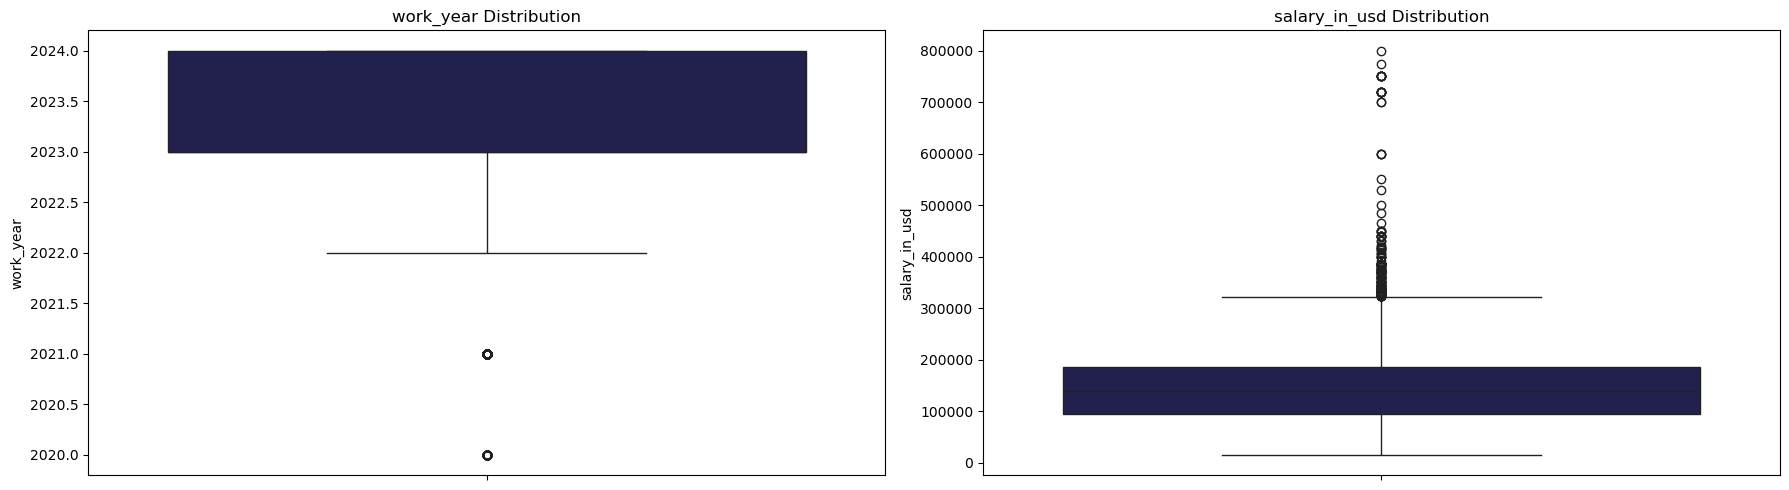

In [30]:
## checking for outliers with the boxplot
# Set up the figure
plt.figure(figsize=(18, 5))

# Define the numerical columns you want to check distribution for
cd= df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for i, column in enumerate(cd, 1):
    plt.subplot(1, len(cd), i)  # Arrange boxplots horizontally
    sns.boxplot(data=df, y=column, color='#1B1A55')
    plt.title(f'{column} Distribution')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [31]:
# Find unique job titles
unique_job_titles = df['job_title'].unique()

# Display the unique job titles
print(unique_job_titles)

['Data Scientist' 'BI Data Analyst' 'ML Engineer'
 'Lead Machine Learning Engineer' 'Data Science Manager'
 'Head of Machine Learning' 'Research Engineer' 'Head of Data Science'
 'AI Programmer' 'Machine Learning Engineer' 'Lead Data Scientist'
 'Data Engineer' 'Applied Machine Learning Scientist' 'Lead Data Analyst'
 'Data Analytics Manager' 'Data Integration Specialist'
 'Principal Data Architect' 'NLP Engineer' 'Big Data Engineer'
 'AI Research Engineer' 'Machine Learning Software Engineer'
 'Data Analyst' 'Applied Data Scientist' 'AI Scientist'
 'Data Analytics Lead' 'Business Data Analyst' 'Product Data Analyst'
 'Computer Vision Engineer' 'Data Science Consultant' 'AI Architect'
 'Analytics Engineer' 'Machine Learning Scientist' 'Research Scientist'
 'Prompt Engineer' 'Principal Data Scientist' 'Applied Scientist'
 'Deep Learning Engineer' 'Data Architect' 'AI Engineer'
 'Data Infrastructure Engineer' 'Data Science' 'Director of Data Science'
 'Data Science Tech Lead' 'BI Analyst

In [32]:
# Define a function to classify job titles into specific categories
def classify_job_title(title):
    title = title.lower()  # Convert to lowercase for case-insensitive matching
    
    # Data Science
    if any(keyword in title for keyword in ["data scientist", "data science", "data science lead", "data practitioner", "analytics lead", "data science manager", "director of data science"]):
        return "Data Science"
    
    # Data Engineering
    elif any(keyword in title for keyword in ["data engineer", "data architect", "etl", "infrastructure engineer", "pipeline", "integration", "cloud engineer", "big data", "data devops", "data operations"]):
        return "Data Eng."
    
    # Machine Learning/AI
    elif any(keyword in title for keyword in ["machine learning", "ml", "ai", "artificial intelligence", "deep learning", "nlp", "vision engineer", "mlops", "computer vision", "autonomous vehicle", "ml scientist", "prompt engineer"]):
        return "ML & AI"
    
    # Business Intelligence (BI) & Analytics
    elif any(keyword in title for keyword in ["business intelligence", "bi", "analytics", "insight", "crm", "visualization", "power bi", "marketing analyst", "decision scientist", "bi developer", "bi analyst"]):
        return "Business Intelligence"
    
    # Data Analyst
    elif any(keyword in title for keyword in ["data analyst", "reporting analyst", "data analytics", "data specialist", "analytics consultant", "data operations analyst", "quantitative analyst", "staff data analyst", "senior data analyst"]):
        return "Data Analyst"
    
    # Product & Strategy
    elif any(keyword in title for keyword in ["product manager", "data product owner", "data product", "data strategy", "strategy manager", "data strategist"]):
        return "Product & Strategy"
    
    # Data Management & Quality
    elif any(keyword in title for keyword in ["data management", "data quality", "data governance", "data steward", "data operations manager", "data compliance"]):
        return "Data Management & Quality"
    
    # Research & Applied Science
    elif any(keyword in title for keyword in ["research scientist", "applied scientist", "computational", "data science researcher", "biologist", "research engineer"]):
        return "Research & Applied Science"
    
    # Leadership & Executive
    elif any(keyword in title for keyword in ["lead", "head", "director", "principal", "chief", "manager", "managing director", "executive"]):
        return "Leadership & Executive"
    
    # Other
    else:
        return "Other"

# Apply the classification to the job_title column
df['job_category'] = df['job_title'].apply(classify_job_title)

# Display the unique categories and a sample of job titles in each
print(df['job_category'].unique())
print(df[['job_title', 'job_category']].sample(10))

['Data Science' 'Business Intelligence' 'ML & AI'
 'Research & Applied Science' 'Data Eng.' 'Data Analyst'
 'Leadership & Executive' 'Product & Strategy' 'Other'
 'Data Management & Quality']
               job_title                job_category
8421      Data Scientist                Data Science
159       Data Architect                   Data Eng.
1743        Data Science                Data Science
5478        Data Analyst                Data Analyst
4870      Data Scientist                Data Science
639         Data Modeler                       Other
833       Data Scientist                Data Science
1336   Applied Scientist  Research & Applied Science
2527       Data Engineer                   Data Eng.
4860  Analytics Engineer       Business Intelligence


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9124 entries, 0 to 9123
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9124 non-null   int64 
 1   experience_level    9124 non-null   object
 2   employment_type     9124 non-null   object
 3   job_title           9124 non-null   object
 4   salary_in_usd       9124 non-null   int64 
 5   employee_residence  9124 non-null   object
 6   remote_ratio        9124 non-null   object
 7   company_location    9124 non-null   object
 8   company_size        9124 non-null   object
 9   job_category        9124 non-null   object
dtypes: int64(2), object(8)
memory usage: 712.9+ KB


In [34]:
data_science = df

In [35]:
data_science

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2021,Mid-Level,Full-Time,Data Scientist,40038,Chile,Remote,Chile,Large,Data Science
1,2021,Mid-Level,Full-Time,BI Data Analyst,36259,Hungary,Hybrid,United States,Large,Business Intelligence
2,2020,Mid-Level,Full-Time,Data Scientist,35735,Hungary,Hybrid,Hungary,Large,Data Science
3,2021,Mid-Level,Full-Time,ML Engineer,77364,Japan,Hybrid,Japan,Small,ML & AI
4,2022,Senior-Level,Full-Time,Lead Machine Learning Engineer,95386,India,Hybrid,India,Large,ML & AI
...,...,...,...,...,...,...,...,...,...,...
9119,2022,Mid-Level,Full-Time,Business Intelligence Developer,15000,Ghana,Remote,Ghana,Medium,Business Intelligence
9120,2020,Expert-Level,Full-Time,Staff Data Analyst,15000,Nigeria,In-Person,Canada,Medium,Data Analyst
9121,2021,Entry-Level,Full-Time,Machine Learning Developer,15000,Thailand,Remote,Thailand,Large,ML & AI
9122,2022,Entry-Level,Full-Time,Data Analyst,15000,Indonesia,In-Person,Indonesia,Large,Data Analyst


# DATA VISUALIZATION

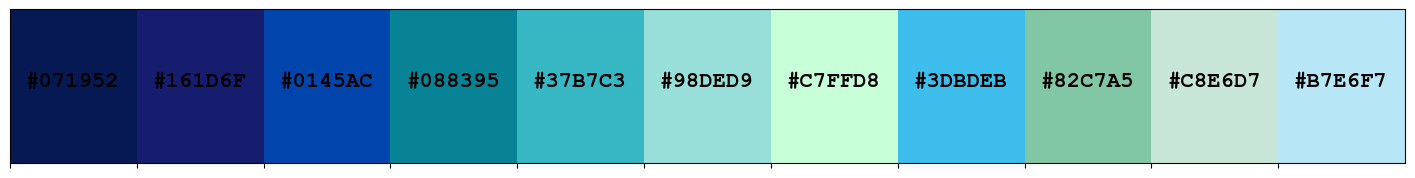

In [37]:
# creating a custom palette for my data
colorss = ['#071952','#161D6F','#0145AC','#088395','#37B7C3','#98DED9','#C7FFD8','#3DBDEB','#82C7A5','#C8E6D7','#B7E6F7']

sns.palplot(colorss)
plt.gcf().set_size_inches(18,2)

for idx,values in enumerate(colorss):
    plt.text(idx-0.375,0, colorss[idx],{'font': "Courier New", 'size':16, 'weight':'bold','color':'black'}, alpha = 1.0)
plt.gcf().set_facecolor('white')

plt.show()

## Checking the various Distributions in the data

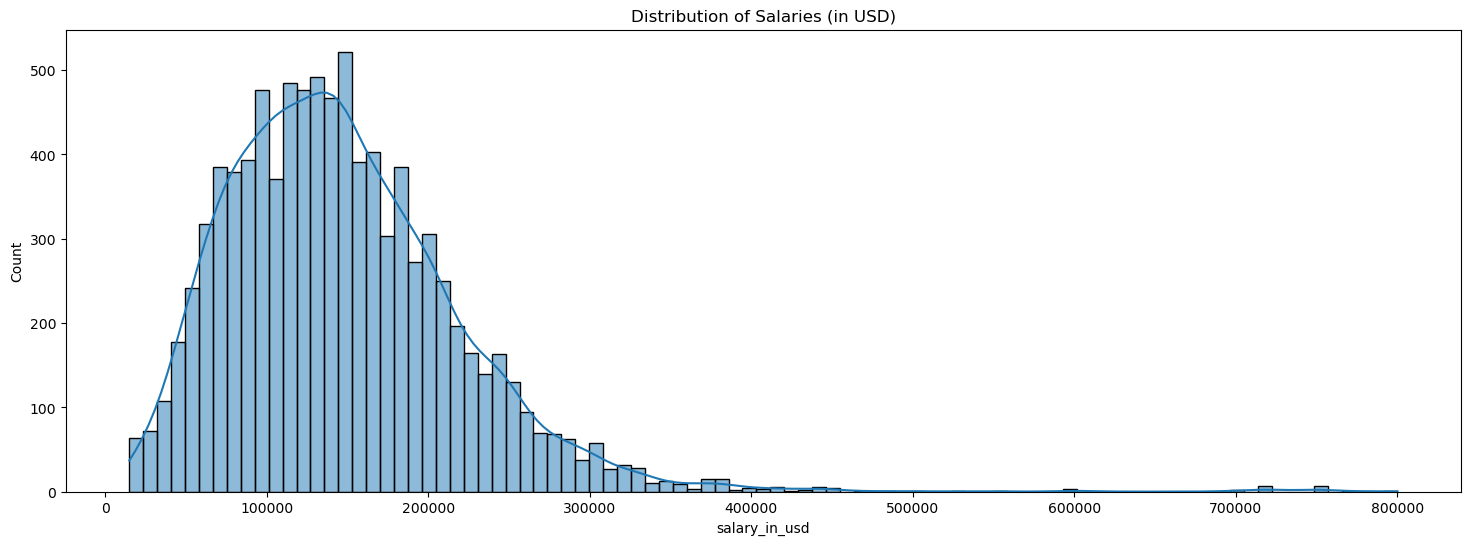

In [39]:
# Salary Distribution
plt.figure(figsize=(18, 6))
sns.histplot(data_science['salary_in_usd'], kde=True)
plt.title("Distribution of Salaries (in USD)")
plt.show()

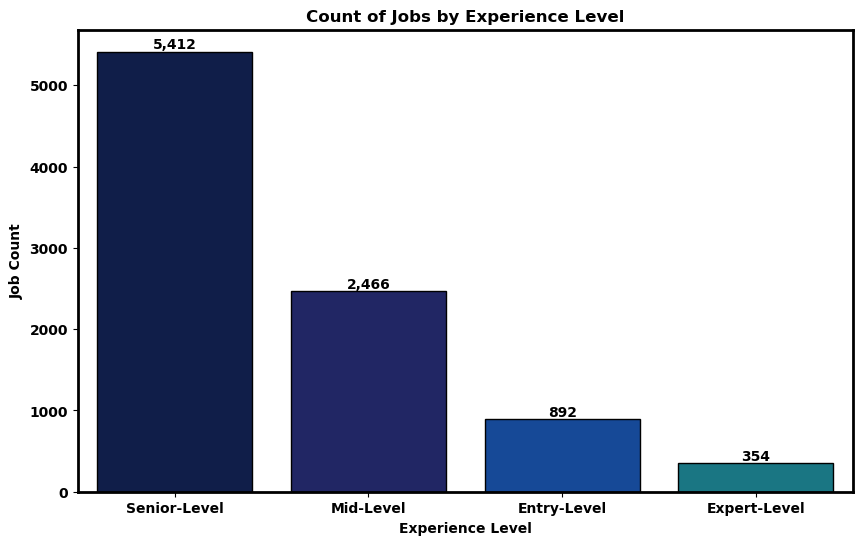

In [40]:
# Sort 'experience_level' by count in descending order
order = data_science['experience_level'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_science, x='experience_level', order=order, edgecolor='black', palette=colorss)
plt.xlabel('Experience Level', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Experience Level', fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')

for spine in ax.spines.values():
    spine.set_linewidth(2)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()

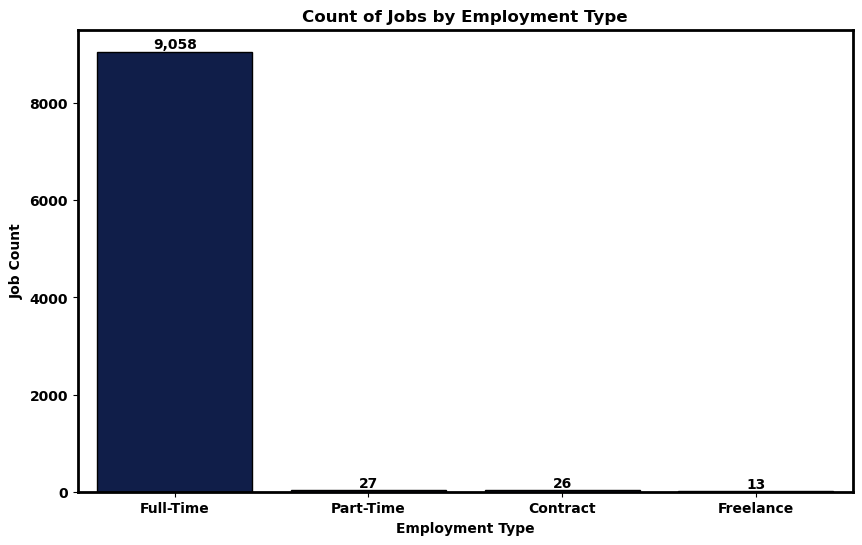

In [41]:
order = data_science['employment_type'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_science, x='employment_type', order=order, edgecolor='black', palette=colorss)
plt.xlabel('Employment Type', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Employment Type', fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')


for spine in ax.spines.values():spine.set_linewidth(2)


for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()

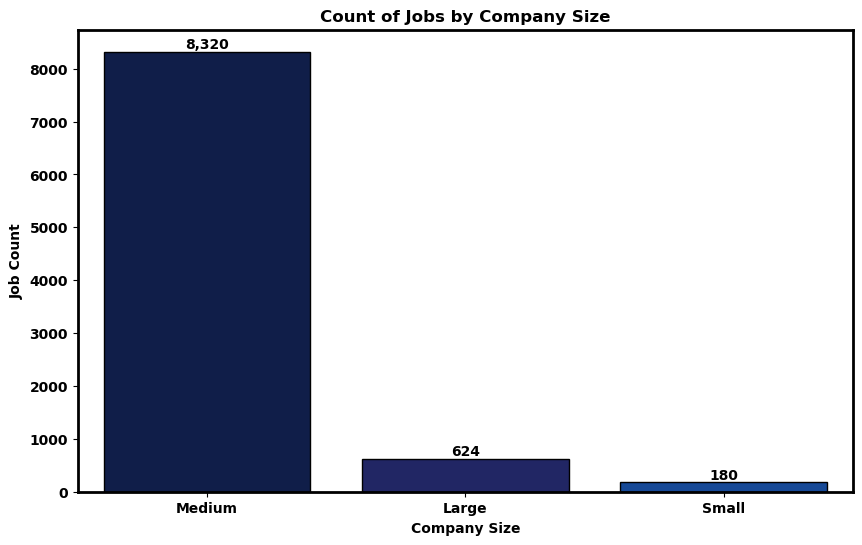

In [42]:
order = data_science['company_size'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_science, x='company_size',order=order, edgecolor='black',palette=colorss)
plt.xlabel('Company Size', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Company Size', fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')

for spine in ax.spines.values():
    spine.set_linewidth(2)


for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()

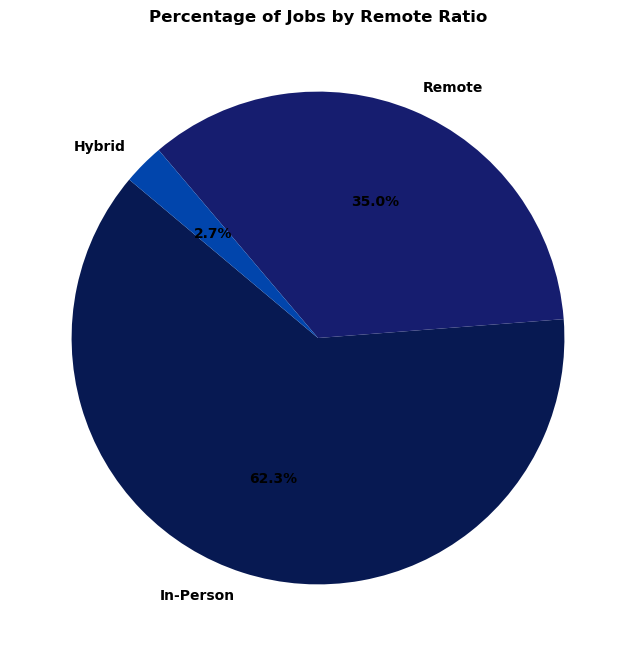

In [43]:
# Calculate the counts for each remote ratio category
remote_ratio_counts = data_science['remote_ratio'].value_counts()

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(remote_ratio_counts, labels=remote_ratio_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=colorss, textprops={'fontweight': 'bold'})

# Set the title
plt.title('Percentage of Jobs by Remote Ratio', fontweight='bold')

# Display the chart
plt.show()

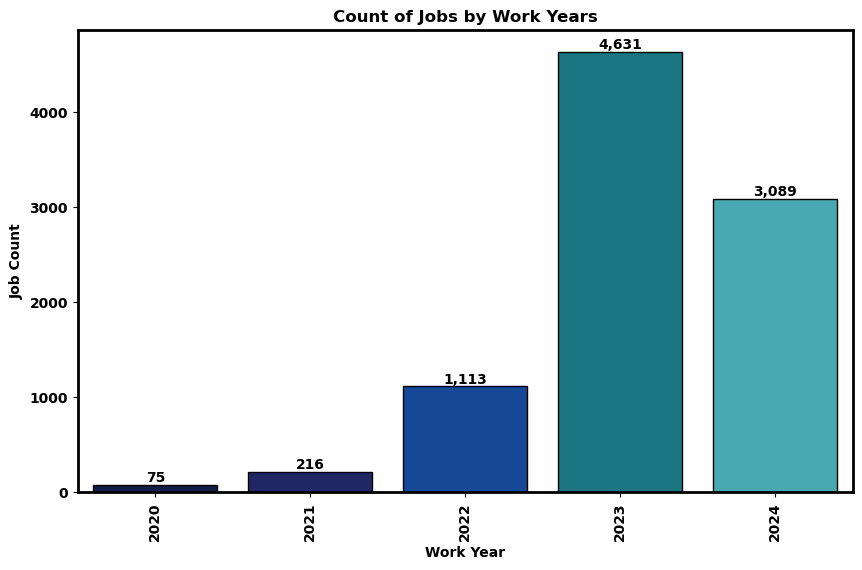

In [44]:
order = data_science['work_year'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='work_year', edgecolor='black',palette=colorss)
plt.xlabel('Work Year', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Work Years', fontweight='bold') # Başlığı burada güncelledik
plt.xticks(rotation=90, fontweight='bold')
plt.yticks(fontweight='bold')

for spine in ax.spines.values():
    spine.set_linewidth(2)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()

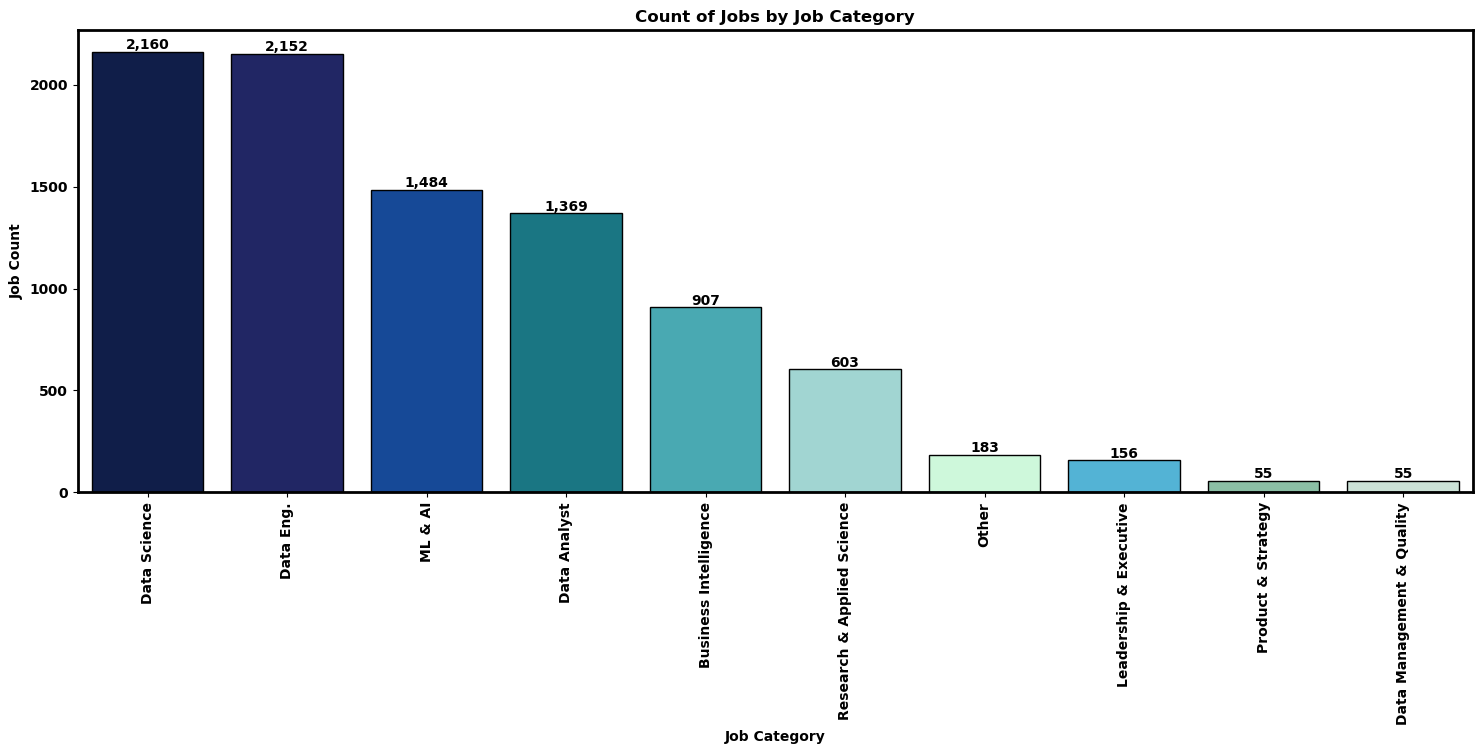

In [45]:
order = data_science['job_category'].value_counts().index

plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df, x='job_category',order=order, edgecolor='black',palette=colorss)
plt.xlabel('Job Category', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Job Category', fontweight='bold') 
plt.xticks(rotation=90, fontweight='bold')
plt.yticks(fontweight='bold')

for spine in ax.spines.values():
    spine.set_linewidth(2)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()

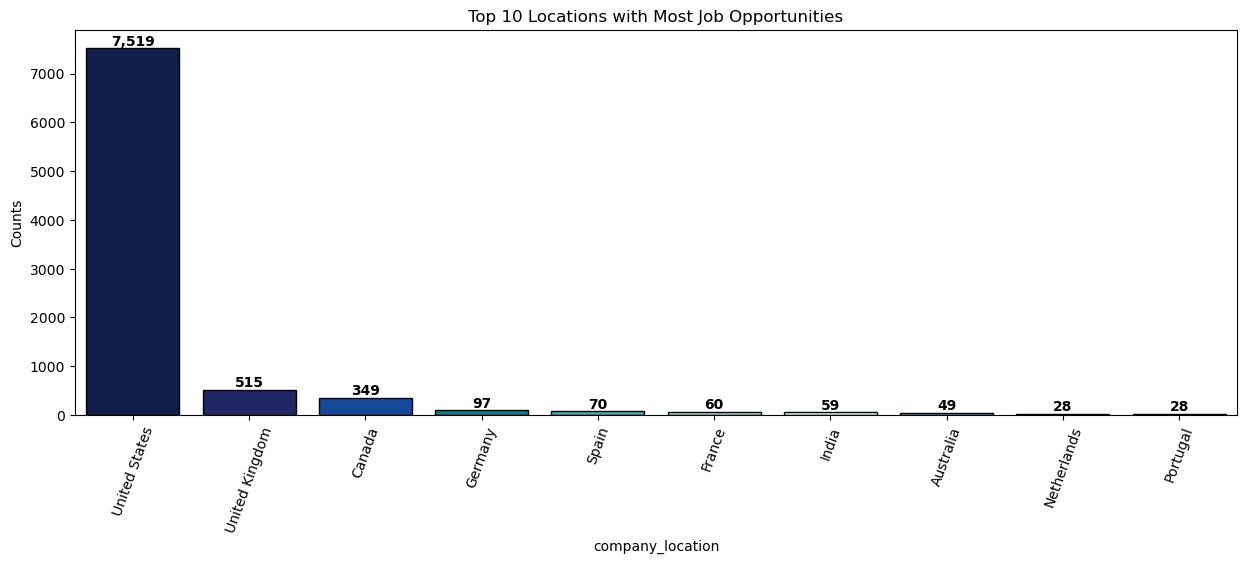

In [46]:
top_10_locations = df['company_location'].value_counts().head(10).index

fig, ax = plt.subplots(facecolor="white", figsize=(15, 5))
sns.countplot(ax=ax, data=df, x='company_location', order=top_10_locations,edgecolor='black',palette=colorss)
ax.set(ylabel='Counts', title='Top 10 Locations with Most Job Opportunities')
ax.set_facecolor("xkcd:white")

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.xticks(rotation=70)
plt.show()

# Exploring the questions

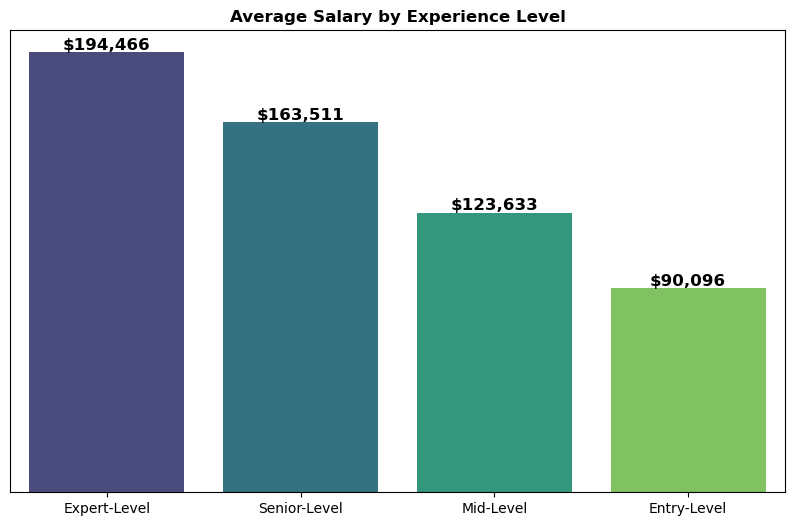

In [48]:
# Q1 -- What is the average salary for data science roles across different experience levels?

# Calculate average salary by experience level
salary_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Sort the values in descending order
salary_experience = salary_experience.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result
plt.figure(figsize=(10,6))
ax = sns.barplot(x='experience_level', y='salary_in_usd', data=salary_experience, palette='viridis')
ax.get_yaxis().set_visible(False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points',fontweight='bold')

# Customizations
plt.title('Average Salary by Experience Level', fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

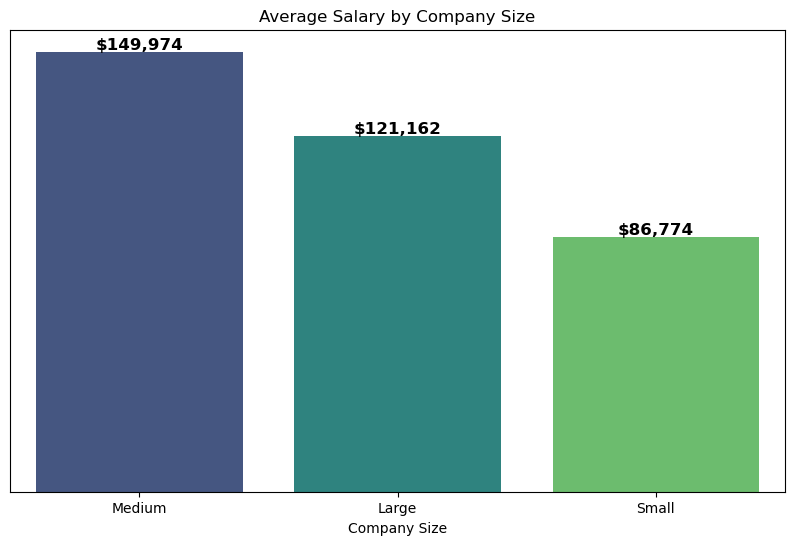

In [49]:
# Q2 -- What is the average salary for data science roles across different company sizes?
# Calculate average salary by company size
salary_company_size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()

# Sort the values in descending order
salary_company_size = salary_company_size.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result
plt.figure(figsize=(10,6))
ax = sns.barplot(x='company_size', y='salary_in_usd', data=salary_company_size, palette='viridis')
ax.get_yaxis().set_visible(False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points',fontweight='bold')

# Customizations
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('')
plt.show()

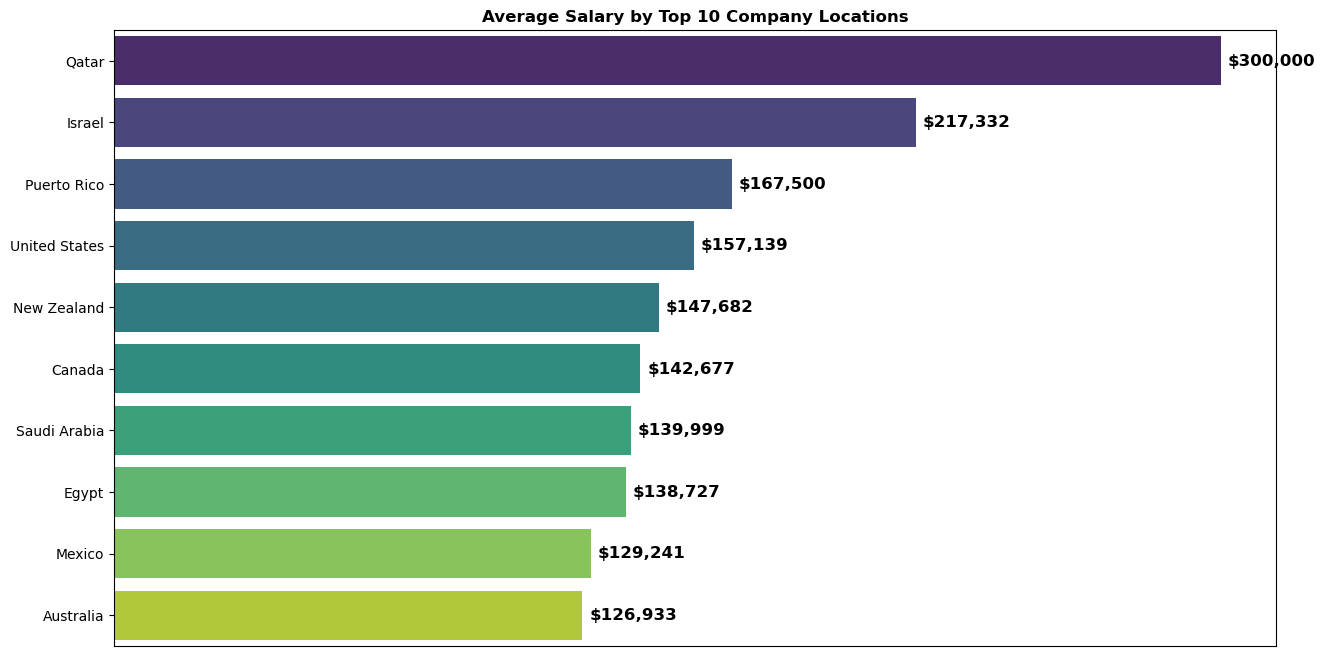

In [50]:
# Q3 -- What is the average salary across different company locations?
# Calculate average salary by company location
salary_location = df.groupby('company_location')['salary_in_usd'].mean().nlargest(10).reset_index()

# Sort the values in descending order
salary_location = salary_location.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result
plt.figure(figsize=(15,8))
ax = sns.barplot(x='salary_in_usd', y='company_location', data=salary_location, palette='viridis')
ax.get_xaxis().set_visible(False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points',fontweight='bold')

# Customizations
plt.title('Average Salary by Top 10 Company Locations',fontweight='bold')
plt.xlabel('Average Salary')
plt.ylabel('')
plt.show()

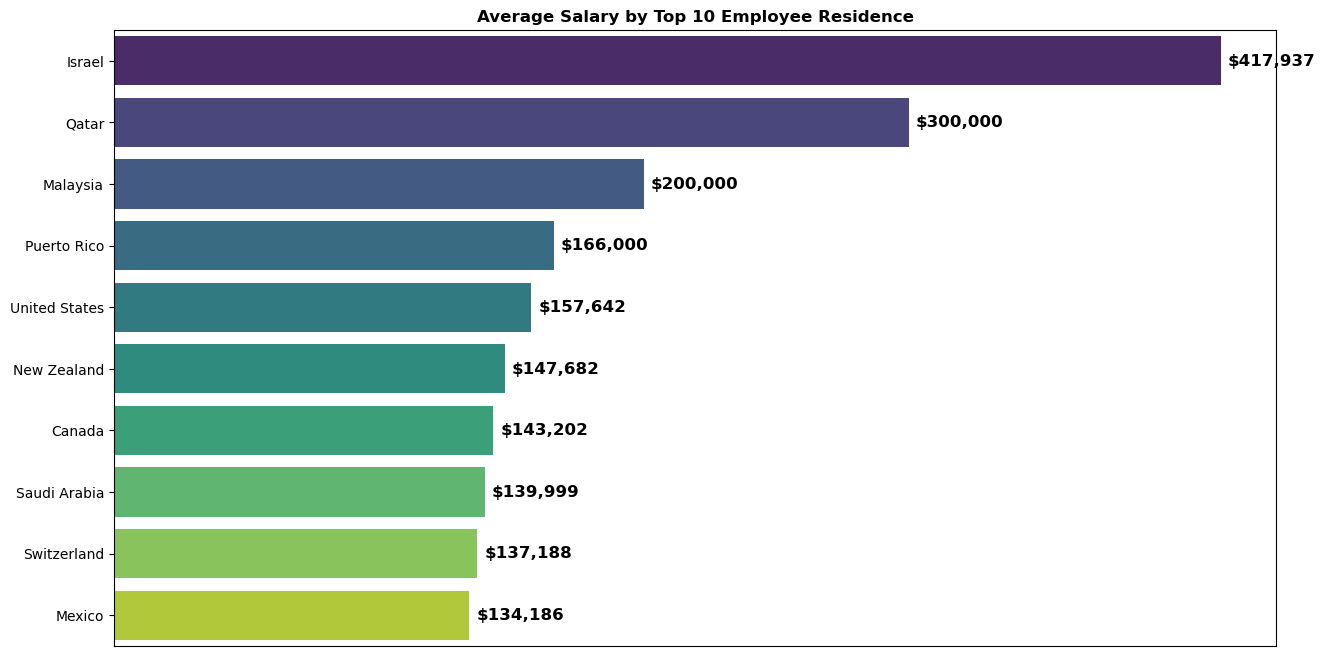

In [51]:
# Q3 -- What is the average salary across different company locations?
# Calculate average salary by company location
salary_location = df.groupby('employee_residence')['salary_in_usd'].mean().nlargest(10).reset_index()

# Sort the values in descending order
salary_location = salary_location.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result
plt.figure(figsize=(15,8))
ax = sns.barplot(x='salary_in_usd', y='employee_residence', data=salary_location, palette='viridis')
ax.get_xaxis().set_visible(False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points',fontweight='bold')

# Customizations
plt.title('Average Salary by Top 10 Employee Residence',fontweight='bold')
plt.xlabel('Average Salary')
plt.ylabel('')
plt.show()

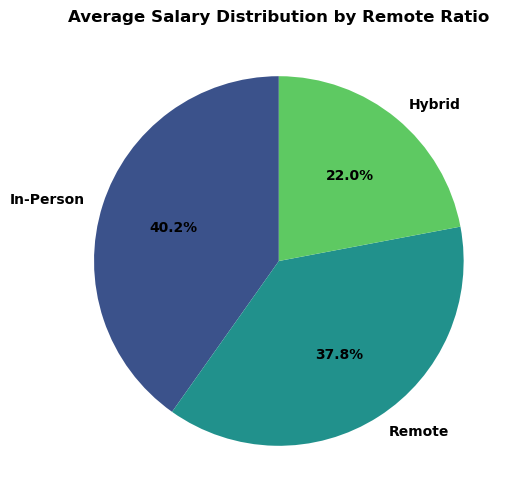

In [52]:
# Calculate average salary for remote ratio
salary_remote = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

# Sort the values in descending order
salary_remote = salary_remote.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result as a pie chart
plt.figure(figsize=(10,6))

# Pie chart requires the values (size) and labels
plt.pie(salary_remote['salary_in_usd'], labels=salary_remote['remote_ratio'], autopct='%1.1f%%', 
        startangle=90, textprops={'fontweight': 'bold'},colors=sns.color_palette('viridis', len(salary_remote)))

# Customizations
plt.title('Average Salary Distribution by Remote Ratio',fontweight='bold')
plt.show()

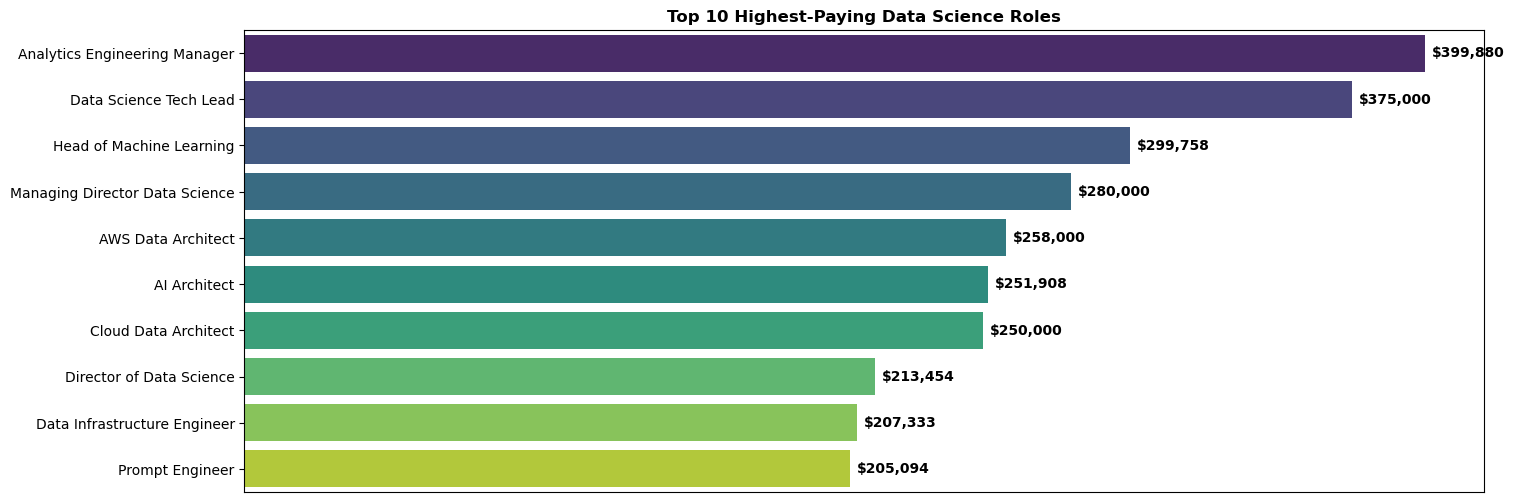

In [53]:
#Question 5 -- Which job roles have the highest-paying opportunities in data science?
# Find the average salary for each job title
high_salary_roles = df.groupby(['job_title'])['salary_in_usd'].mean().reset_index()
top_salaries = high_salary_roles.nlargest(10, 'salary_in_usd')  # Top 10 highest-paying roles

# Plot top roles with highest salaries
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=top_salaries, y='job_title', x='salary_in_usd', dodge=False, palette='viridis')
ax.get_xaxis().set_visible(False)  # Hide the x-axis (Average Salary)
ax.set_ylabel('')  # Hide the y-axis label "Job Title"
plt.title('Top 10 Highest-Paying Data Science Roles',fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontweight='bold')

plt.show()

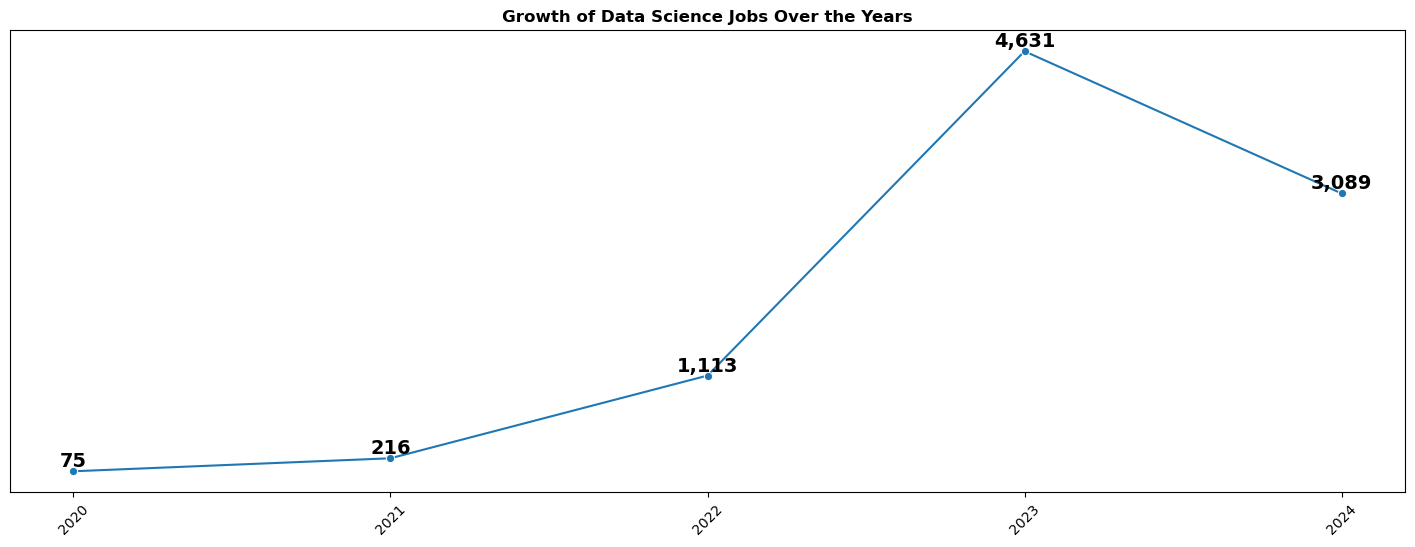

In [54]:
# Count the number of job listings per year
job_growth_per_year = df.groupby('work_year').size().reset_index(name='job_count')

# Sort the values by year to ensure the trend is displayed correctly
job_growth_per_year = job_growth_per_year.sort_values(by='work_year', ascending=True)

# Plotting the result
plt.figure(figsize=(18,6))
ax = sns.lineplot(x='work_year', y='job_count', data=job_growth_per_year, marker='o', palette='viridis')
ax.get_yaxis().set_visible(False)  # Hide the x-axis (Average Salary)

# Add data labels
for i in range(len(job_growth_per_year)):
    ax.text(job_growth_per_year['work_year'].iloc[i], job_growth_per_year['job_count'].iloc[i], 
            f'{job_growth_per_year["job_count"].iloc[i]:,}', fontsize=14, ha='center', va='bottom',fontweight='bold')

# Customizations
plt.title('Growth of Data Science Jobs Over the Years',fontweight='bold')
plt.xlabel('')
plt.ylabel('')  # Remove y-axis labels
plt.xticks(job_growth_per_year['work_year'], rotation=45)  # Ensure only years are shown
plt.show()

# MACHINE LEARNING

In [275]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [276]:
data_science

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2021,Mid-Level,Full-Time,Data Scientist,40038,Chile,Remote,Chile,Large,Data Science
1,2021,Mid-Level,Full-Time,BI Data Analyst,36259,Hungary,Hybrid,United States,Large,Business Intelligence
2,2020,Mid-Level,Full-Time,Data Scientist,35735,Hungary,Hybrid,Hungary,Large,Data Science
3,2021,Mid-Level,Full-Time,ML Engineer,77364,Japan,Hybrid,Japan,Small,ML & AI
4,2022,Senior-Level,Full-Time,Lead Machine Learning Engineer,95386,India,Hybrid,India,Large,ML & AI
...,...,...,...,...,...,...,...,...,...,...
9119,2022,Mid-Level,Full-Time,Business Intelligence Developer,15000,Ghana,Remote,Ghana,Medium,Business Intelligence
9120,2020,Expert-Level,Full-Time,Staff Data Analyst,15000,Nigeria,In-Person,Canada,Medium,Data Analyst
9121,2021,Entry-Level,Full-Time,Machine Learning Developer,15000,Thailand,Remote,Thailand,Large,ML & AI
9122,2022,Entry-Level,Full-Time,Data Analyst,15000,Indonesia,In-Person,Indonesia,Large,Data Analyst


In [277]:
# defining columns of interest
ds = data_science[['experience_level','employment_type','remote_ratio','company_size','salary_in_usd',]]

In [278]:
# use OneHot encoder for experience level and company size
# use label encoder for employment type and remote_ratio

In [279]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['employment_type', 'remote_ratio']

# Apply label encoding to each column
for col in columns_to_encode:
    ds[col] = label_encoder.fit_transform(ds[col])

In [280]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the 'salary_in_usd' column
ds['scaled_salary'] = scaler.fit_transform(ds[['salary_in_usd']])

# Display the first few rows with the scaled salary
print(ds[['salary_in_usd', 'scaled_salary']].head())

   salary_in_usd  scaled_salary
0          40038      -1.453653
1          36259      -1.505128
2          35735      -1.512266
3          77364      -0.945223
4          95386      -0.699740


In [281]:
# Columns to encode
columns_to_encode = ['experience_level', 'company_size']

# Initialize OneHotEncoder with drop='first' to avoid multicollinearity (optional)
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the encoder on the specified columns
encoded_data = encoder.fit_transform(ds[columns_to_encode])

# Convert the encoded data to a DataFrame
encoded_ds = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate with the original DataFrame (dropping the original encoded columns)
ds = pd.concat([ds.drop(columns_to_encode, axis=1), encoded_ds], axis=1)

# Display the result
ds.head()

,employment_type,remote_ratio,salary_in_usd,scaled_salary,experience_level_Expert-Level,experience_level_Mid-Level,experience_level_Senior-Level,company_size_Medium,company_size_Small
0,2,2,40038,-1.453653,0.0,1.0,0.0,0.0,0.0
1,2,0,36259,-1.505128,0.0,1.0,0.0,0.0,0.0
2,2,0,35735,-1.512266,0.0,1.0,0.0,0.0,0.0
3,2,0,77364,-0.945223,0.0,1.0,0.0,0.0,1.0
4,2,0,95386,-0.699740,0.0,0.0,1.0,0.0,0.0


In [282]:
ds.head()

,employment_type,remote_ratio,salary_in_usd,scaled_salary,experience_level_Expert-Level,experience_level_Mid-Level,experience_level_Senior-Level,company_size_Medium,company_size_Small
0,2,2,40038,-1.453653,0.0,1.0,0.0,0.0,0.0
1,2,0,36259,-1.505128,0.0,1.0,0.0,0.0,0.0
2,2,0,35735,-1.512266,0.0,1.0,0.0,0.0,0.0
3,2,0,77364,-0.945223,0.0,1.0,0.0,0.0,1.0
4,2,0,95386,-0.699740,0.0,0.0,1.0,0.0,0.0


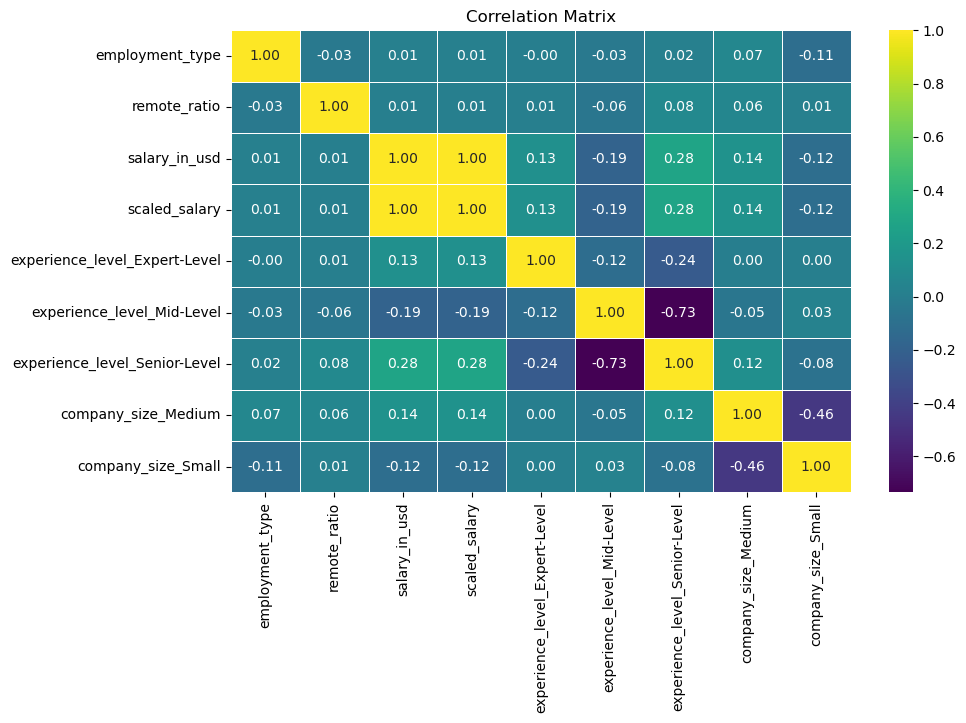

In [283]:
# Compute the correlation matrix
correlation_matrix = ds.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [284]:
# Drop the 'scaled_salary' and 'salary_in_usd' columns from the dataset to get the features (X)
x = ds.drop(['scaled_salary', 'salary_in_usd'], axis=1)

# The target variable (y) is the 'scaled_salary' column
y = ds['scaled_salary']

In [285]:
x

,employment_type,remote_ratio,experience_level_Expert-Level,experience_level_Mid-Level,experience_level_Senior-Level,company_size_Medium,company_size_Small
0,2,2,0.0,1.0,0.0,0.0,0.0
1,2,0,0.0,1.0,0.0,0.0,0.0
2,2,0,0.0,1.0,0.0,0.0,0.0
3,2,0,0.0,1.0,0.0,0.0,1.0
4,2,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
9119,2,2,0.0,1.0,0.0,1.0,0.0
9120,2,1,1.0,0.0,0.0,1.0,0.0
9121,2,2,0.0,0.0,0.0,0.0,0.0
9122,2,1,0.0,0.0,0.0,0.0,0.0


In [286]:
y

0      -1.453653
1      -1.505128
2      -1.512266
3      -0.945223
4      -0.699740
          ...   
9119   -1.794704
9120   -1.794704
9121   -1.794704
9122   -1.794704
9123   -1.781546
Name: scaled_salary, Length: 9124, dtype: float64

In [287]:
# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [288]:
# Display the shapes of the training and test sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7299, 7) (1825, 7) (7299,) (1825,)


In [289]:
# Initialize the model
model = LinearRegression()

In [290]:
# Train the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [291]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [292]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2_lr= r2_score(y_test, y_pred)  # R-squared

print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R-squared-R² Score: {r2_lr}')

Linear Regression Mean Squared Error: 0.9725583496046697
Linear Regression R-squared-R² Score: 0.12562685960084585


In [293]:
from sklearn.ensemble import RandomForestRegressor

In [294]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [295]:
# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [296]:
# Train the model on the training data
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [297]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)

In [298]:
y_pred_rf

array([ 0.28089439,  0.16757737,  0.65194304, ...,  0.28089439,
       -0.22286172, -0.79920075])

In [299]:
# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)  # R-squared

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared-R² Score: {r2_rf}')

Random Forest Mean Squared Error: 0.9655858523661237
Random Forest R-squared-R² Score: 0.13189544421519828


In [300]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Train the model
knn_reg_model = KNeighborsRegressor(n_neighbors=5)
knn_reg_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_knn = knn_reg_model.predict(x_test)

# Evaluate using Mean Squared Error (MSE)
print("KNN Regression - Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_knn))

# Calculate R² score
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN Regression - R² Score:", r2_knn)

KNN Regression - Mean Squared Error (MSE): 1.3993395476518853
KNN Regression - R² Score: -0.25806838763192297


In [308]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_dt = decision_tree_model.predict(x_test)

# Evaluate using Mean Squared Error (MSE)
print("Decision Tree Regression - Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dt))

# Calculate R² score
r2_dt= r2_score(y_test, y_pred_dt)
print("Decision Tree Regression - R² Score:", r2_dt)

Decision Tree Regression - Mean Squared Error (MSE): 0.9673305846707152
Decision Tree Regression - R² Score: 0.13032685240274655


In [310]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
svm_reg_model = SVR(kernel='linear')  # You can also try 'rbf' or 'poly' for different kernels
svm_reg_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_svm = svm_reg_model.predict(x_test)

# Evaluate using Mean Squared Error (MSE)
print("SVM Regression - Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_svm))

# Calculate R² score
r2_svm= r2_score(y_test, y_pred_svm)
print("SVM Regression - R² Score:", r2_svm)

SVM Regression - Mean Squared Error (MSE): 0.9960604916297491
SVM Regression - R² Score: 0.10449739036444605


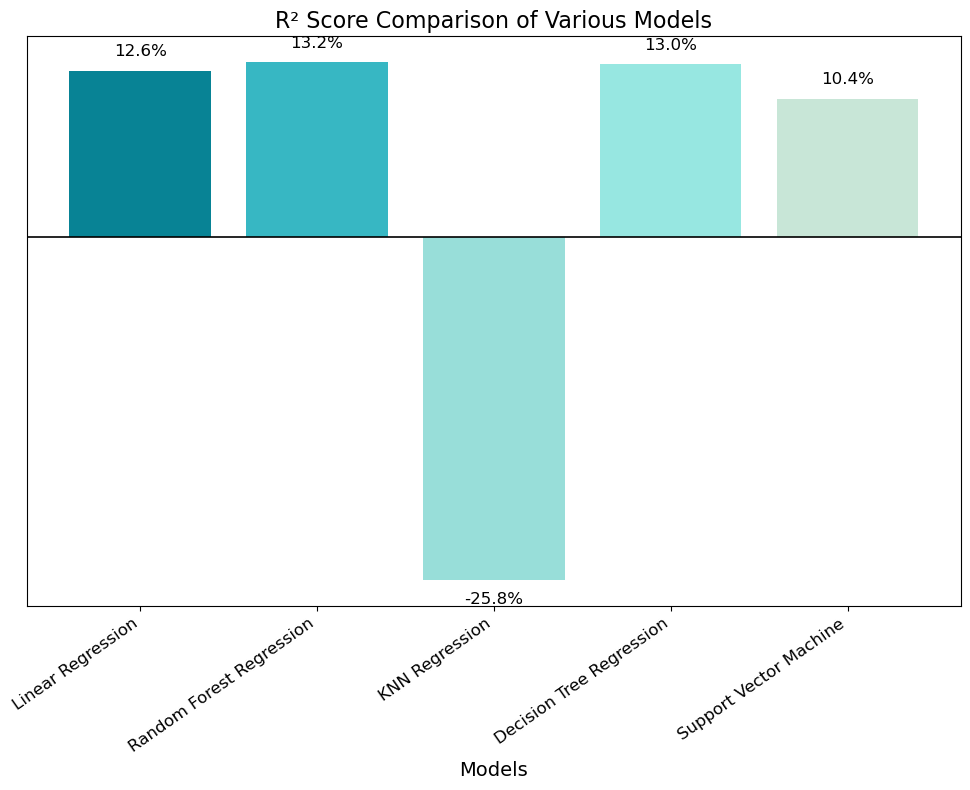

In [356]:
import matplotlib.pyplot as plt

# Assuming you've already computed R² scores for each model
models = ['Linear Regression', 'Random Forest Regression', 'KNN Regression', 'Decision Tree Regression', 'Support Vector Machine']
r2_scores = [r2_lr, r2_rf, r2_knn, r2_dt, r2_svm]  # Replace with actual R² scores, including negative values if applicable

# Custom palette
colorss = ['#088395', '#37B7C3', '#98DED9', '#97E7E1', '#C8E6D7', '#C7FFD8']

# Plotting the R² scores
plt.figure(figsize=(10, 8))
bars = plt.bar(models, r2_scores, color=colorss[:len(models)])  # Use only as many colors as there are models

# Add data labels in percentages
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + (0.02 if height >= 0 else -0.02),  # Adjust position for positive and negative values
        f'{height * 100:.1f}%',  # Convert the value to percentage
        ha='center', 
        va='top' if height >= 0 else 'bottom',  # Position labels inside for negative bars
        fontsize=12
    )

# Customize the axis
ax = plt.gca()

# Show the x-axis line at y=0
ax.axhline(0, color='black', linewidth=1.2)  # Adds the horizontal line at y=0
ax.yaxis.set_visible(False)  # Hide y-axis ticks and labels

# Customize the chart
plt.xlabel('Models', fontsize=14)
plt.title('R² Score Comparison of Various Models', fontsize=16)

# Adjust x-axis labels for better readability (rotate labels)
plt.xticks(rotation=35, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()